# Hotel Bookings EDA

By: Erike, Reyhan, Ano

## Context: 
The tourism industry is one of the industries that are most affected by the Covid-19 pandemic, specifically, the hotel industry. With travel restrictions, according to research conducted by Mckinsey in 2020, the rate of hotel bookings has been deeply decreased, it makes investors of the industry very pessimistic.

To deal with this, hotel owners need to operate their operations efficiently to increase revenue so they can 'survive' from this pandemic. Therefore, we will carry out Exploratory Data Analysis with the 'Hotel Booking Demand' database to find out what can be improved from a hotel operation.

## Business Problem:
- Increase the Revenue, by:
    - Decreasing the cancellation rate
    - Increasing the Hotel Occupancy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [4]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## Business Questions

### Business Question 1:
How long does the guests in city hotels and resort hotel stay?


In [6]:
# Create a new column for the total duration of stay
df['staydur'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']
df['staydur']

0         0
1         0
2         1
3         1
4         2
         ..
119385    7
119386    7
119387    7
119388    7
119389    9
Name: staydur, Length: 119390, dtype: int64

In [7]:
df['staydur'].describe()

count    119390.000000
mean          3.427900
std           2.557439
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: staydur, dtype: float64

In [8]:
# The number of guest whose duration of stay is above the average at a city hotel

df[(df['hotel']=='City Hotel') & (df['staydur']>=4)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,staydur
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,9.0,NaN,0,Transient,76.50,0,1,Canceled,2015-07-01,4
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,9.0,NaN,0,Transient,68.00,0,1,Canceled,2015-04-30,4
40063,City Hotel,1,92,2015,July,27,1,2,4,2,...,9.0,NaN,0,Transient,76.50,0,2,Canceled,2015-06-23,6
40067,City Hotel,1,63,2015,July,27,2,1,3,1,...,9.0,NaN,0,Transient,68.00,0,0,Canceled,2015-06-25,4
40068,City Hotel,1,62,2015,July,27,2,2,3,2,...,8.0,NaN,0,Transient,76.50,0,1,No-Show,2015-07-02,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,7


In [9]:
# The number of guests whose duration of stay is above the average at a resort hotel

df[(df['hotel']=='Resort Hotel') & (df['staydur']>=4)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,staydur
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,240.0,NaN,0,Transient,123.00,0,0,Canceled,2015-06-23,4
11,Resort Hotel,0,35,2015,July,27,1,0,4,2,...,240.0,NaN,0,Transient,145.00,0,0,Check-Out,2015-07-05,4
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,240.0,NaN,0,Transient,97.00,0,3,Check-Out,2015-07-05,4
13,Resort Hotel,0,18,2015,July,27,1,0,4,2,...,241.0,NaN,0,Transient,154.77,0,1,Check-Out,2015-07-05,4
14,Resort Hotel,0,37,2015,July,27,1,0,4,2,...,241.0,NaN,0,Transient,94.71,0,0,Check-Out,2015-07-05,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,...,143.0,NaN,0,Transient,89.75,0,0,Check-Out,2017-09-10,10
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,...,250.0,NaN,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10,11
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,...,250.0,NaN,0,Transient,153.57,0,3,Check-Out,2017-09-12,14
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,...,40.0,NaN,0,Contract,112.80,0,1,Check-Out,2017-09-14,14


In [10]:
# Numbers of guests whose duration of stay is above average at city hotels and resort hotels
pd.crosstab(index=df['hotel'], columns=df['staydur']>=4)

staydur,False,True
hotel,,
City Hotel,56410,22920
Resort Hotel,20044,20016


Recap:
- 22920 City Hotel guests stayed longer than average and 56410 City Hotel customers stayed 1-3 days.
- 20016 Resort Hotel guests stay longer than average and as many as 20044 Resort Hotel guests stayed 1-3 days

In [11]:
pd.crosstab(index=df['hotel'], columns=df['staydur']>3, normalize=True)*100

staydur,False,True
hotel,,
City Hotel,47.248513,19.197588
Resort Hotel,16.788676,16.765223


### Insights 1:

- 47% of guests stay at City Hotel for less than the average length of stay. (Only 1-3 days)
- Only 19% of guests at City Hotel stayed for longer stay.
- Customers who stay at Resort Hotels have the same tendency between those who stay within 1-3 days and more than 4 days/long stay

### Business Question 2:
From 2015-2017, how is the trend in the number of guest staying at City Hotels and Resort Hotels?

In [12]:
df_city = df[(df['hotel']=='City Hotel') & (df['staydur']>0)]

In [13]:
df_resort = df[(df['hotel']=='Resort Hotel') & (df['staydur']>0)]

In [14]:
pd.crosstab(index = df_city['arrival_date_year'], columns=(df_city['reservation_status']=='Check-Out'))

reservation_status,False,True
arrival_date_year,,
2015,6004,7624
2016,15394,22553
2017,11681,15743


In [15]:
pd.crosstab(index = df_resort['arrival_date_year'], columns=(df_resort['reservation_status']=='Check-Out'))

reservation_status,False,True
arrival_date_year,,
2015,2137,6077
2016,4920,13423
2017,4053,9066


### Insights 2:

- In City Hotel, guest who stayed until Check-Out in 2015 were 7624, in 2016 22553, and in 2017 were 15743. There was an increase in number of guests on 2015-2016 as many as 14929 visitors or as much as 195%. But the numbers has decreased in 2017 as many as 7080 visitors or 31% from the previous year.

- In Resort Hotel, guest who stayed until Check-Out in 2015 were 6077, in 2016 13423, and in 2017 were 9066. There was an increase in number of guest on 2015-2016 as many as 7346 visitors or as much as 120%. But the numbers has decreased in 2017 as many as 4357 visitors or 32% from the previous year.

### Business Question 3:

From 2015-2017, how is the trend of visitors staying per month at each hotel?

In [16]:
# The table contains guest per month at city hotels and resort hotels in 2015-2017

tabel = pd.crosstab(index=df['arrival_date_month'], columns=[df['hotel'],df['arrival_date_year']])
tabel

hotel              City Hotel             Resort Hotel            
arrival_date_year        2015  2016  2017         2015  2016  2017
arrival_date_month                                                
April                       0  3561  3919            0  1867  1742
August                   2480  3378  3125         1409  1685  1800
December                 1654  2478     0         1266  1382     0
February                    0  2371  2594            0  1520  1583
January                     0  1364  2372            0   884  1309
July                     1398  3131  3559         1378  1441  1754
June                        0  3923  3971            0  1369  1676
March                       0  3046  3412            0  1778  1558
May                         0  3676  4556            0  1802  1757
November                 1235  3122     0         1105  1332     0
October                  3386  4219     0         1571  1984     0
September                3529  3871     0         1585  1523     0

In [17]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
tabel1 = tabel.reindex(months, axis=0)
tabel1

hotel              City Hotel             Resort Hotel            
arrival_date_year        2015  2016  2017         2015  2016  2017
arrival_date_month                                                
January                     0  1364  2372            0   884  1309
February                    0  2371  2594            0  1520  1583
March                       0  3046  3412            0  1778  1558
April                       0  3561  3919            0  1867  1742
May                         0  3676  4556            0  1802  1757
June                        0  3923  3971            0  1369  1676
July                     1398  3131  3559         1378  1441  1754
August                   2480  3378  3125         1409  1685  1800
September                3529  3871     0         1585  1523     0
October                  3386  4219     0         1571  1984     0
November                 1235  3122     0         1105  1332     0
December                 1654  2478     0         1266  1382     0

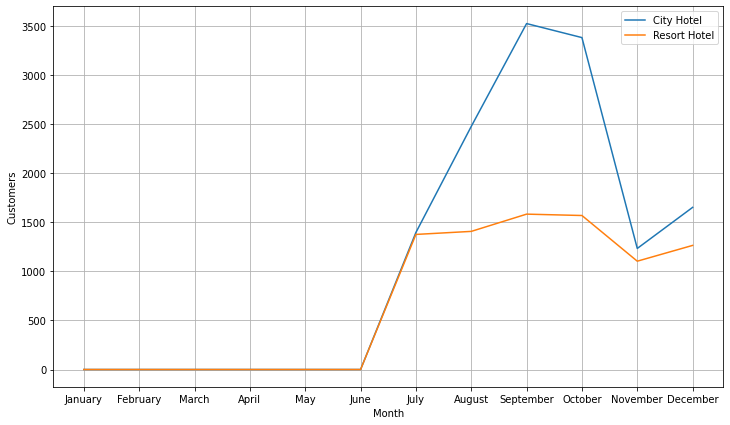

In [18]:
plt.figure(figsize=(12, 7))
plt.plot(tabel1['City Hotel'][2015])
plt.plot(tabel1['Resort Hotel'][2015])
plt.legend(['City Hotel','Resort Hotel'])
plt.xlabel('Month')
plt.ylabel('Customers')
plt.grid()
plt.savefig('2015.png')
plt.show()

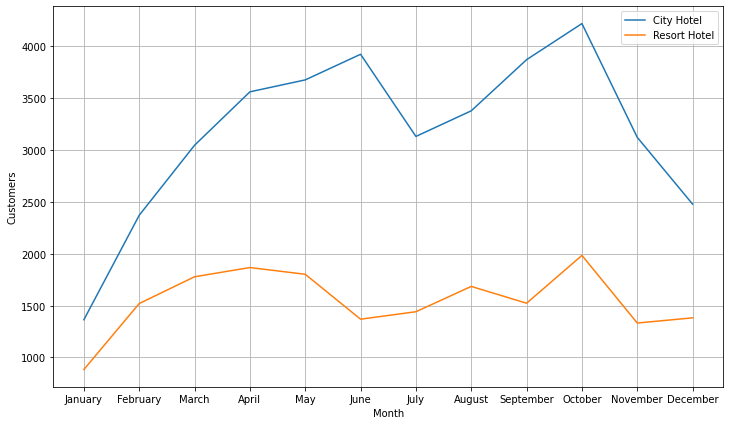

In [19]:
plt.figure(figsize=(12, 7))
plt.plot(tabel1['City Hotel'][2016])
plt.plot(tabel1['Resort Hotel'][2016])
plt.legend(['City Hotel','Resort Hotel'])
plt.xlabel('Month')
plt.ylabel('Customers')
plt.grid()
plt.savefig('2016.png')
plt.show()

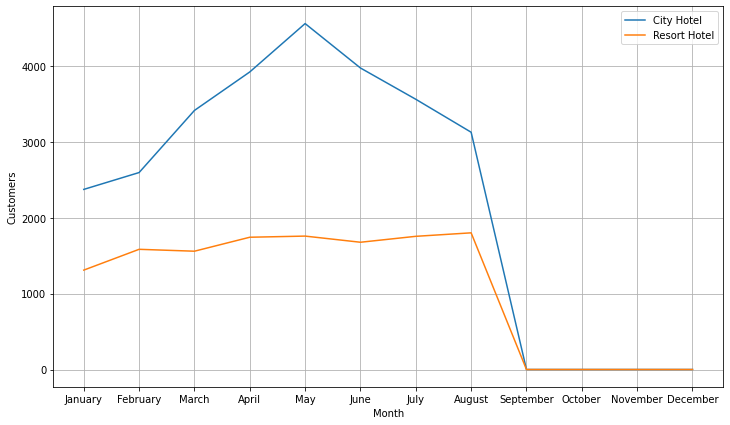

In [20]:
plt.figure(figsize=(12, 7))
plt.plot(tabel1['City Hotel'][2017])
plt.plot(tabel1['Resort Hotel'][2017])
plt.legend(['City Hotel','Resort Hotel'])
plt.xlabel('Month')
plt.ylabel('Customers')
plt.grid()
plt.savefig('2017.png')
plt.show()

### Insights 3:
- In 2015 there was an increase in City Hotel guests between July-September and a decrease in November, while Resort Hotel visitors during July-December did not experience much fluctuation.
- In 2016 there was an increase in City Hotel guests from January to June, although there was a decline in July, but the numbers of guest experienced a bounce back in August and peaked in October, then decreased again until the end of the year. Resort Hotels also experienced an upward and downward trend that is not much different each months. The numbers peaked in October, but its numbers is only half from numbers of guest from City Hotel.
- In 2017 there was an increase in City Hotel visitors between January-May and a decrease in June-August, while Resort Hotels at the same time received visitors which number did not change much for each month.

### Business Question 4:
Which deposit type has the highest cancellation rate?

In [21]:
(pd.crosstab(index=df['deposit_type'], columns=df['is_canceled'], normalize=True, margins=True, margins_name='Total') * 100).round(2)

is_canceled,0,1,Total
deposit_type,,,
No Deposit,62.77,24.87,87.65
Non Refund,0.08,12.14,12.22
Refundable,0.11,0.03,0.14
Total,62.96,37.04,100.00


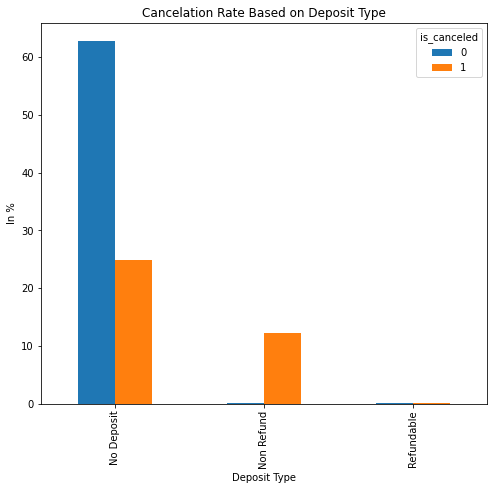

In [22]:
(pd.crosstab(index=df['deposit_type'], columns=df['is_canceled'], normalize=True) * 100).round(2).plot(kind='bar', figsize=(8, 7),
title = 'Cancelation Rate Based on Deposit Type',
xlabel = ('Deposit Type'), ylabel = 'In %')
plt.show()

### Insights 4:

- Orders with the deposit type of 'No Deposit' are the most common type of deposit with a percentage of 87.65% of the total order amount.

- Based on the bivariate analysis above, from the total of all bookings at the hotel, orders without a deposit have the highest cancellation rate, amounting to 24.87%.

### Business Question 5:

Which hotel type has the highest booking cancellation rate?

In [23]:
(pd.crosstab(df['hotel'], df['is_canceled'], normalize=True, margins=True, margins_name='Total') * 100).round(2)

is_canceled,0,1,Total
hotel,,,
City Hotel,38.72,27.73,66.45
Resort Hotel,24.24,9.32,33.55
Total,62.96,37.04,100.00


### Insights 5:

- The most booked hotel type is city hotel with a percentage of 66.45% of all bookings.

- From the results of the bivariate analysis above, it can be seen that the cancellation rate at city hotels is almost 3 times that of Resort Hotels.

To analyze more deeply, let's enter the deposit type variable into the bivariate analysis.

In [24]:
(pd.crosstab(index=[df['hotel'], df['deposit_type']], columns=df['is_canceled'], normalize=True, margins=True, margins_name='Total') * 100).round(2)

is_canceled                    0      1   Total
hotel        deposit_type                      
City Hotel   No Deposit    38.70  16.96   55.65
             Non Refund     0.02  10.76   10.78
             Refundable     0.01   0.01    0.02
Resort Hotel No Deposit    24.08   7.92   32.00
             Non Refund     0.06   1.38    1.44
             Refundable     0.10   0.02    0.12
Total                      62.96  37.04  100.00

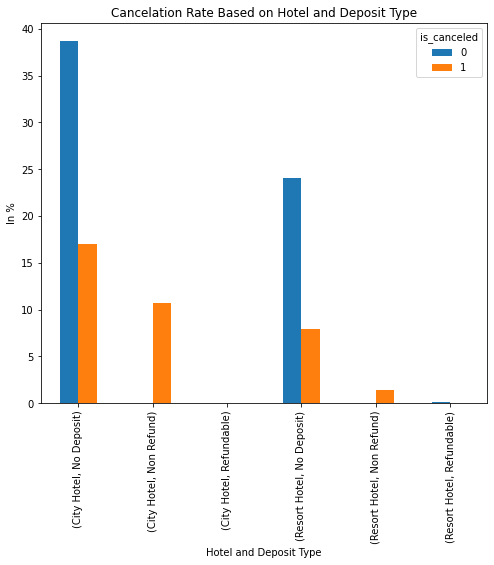

In [25]:
(pd.crosstab(index=[df['hotel'], df['deposit_type']], columns=df['is_canceled'], normalize=True) * 100).round(2).plot(kind='bar', figsize=(8, 7), title = 'Cancelation Rate Based on Hotel and Deposit Type',
xlabel = ('Hotel and Deposit Type'), ylabel = 'In %')
plt.show()

### Insights 5:

- From the multivariate analysis above, it can be seen that the highest cancellation rate comes from order for City Hotel type hotels with no deposit.

### Business Question 6:
Which Market Segment has the highest cancellation rate?

In [26]:
(pd.crosstab(df['market_segment'], df['is_canceled'], normalize=True, margins=True, margins_name='Total') * 100).round(2)

is_canceled,0,1,Total
market_segment,,,
Aviation,0.15,0.04,0.20
Complementary,0.54,0.08,0.62
Corporate,3.60,0.83,4.44
Direct,8.94,1.62,10.56
Groups,6.46,10.13,16.59
Offline TA/TO,13.32,6.96,20.29
Online TA,29.93,17.37,47.30
Undefined,0.00,0.00,0.00
Total,62.96,37.04,100.00


### Insight 6:

1. Most hotel bookings made through Online Travel Agents, amounted to 47.3% of the total bookings made.

2. From the results of the bivariate analysis above, it can be seen that the highest cancellation rate comes from Online TA with the percentage of 17.37%.

To analyze further, let's input the deposit type variable into the bivariate analysis above.

In [27]:
(pd.crosstab(index=[df['market_segment'], df['deposit_type']], columns=df['is_canceled'], normalize=True, margins=True, margins_name='Total') * 100).round(2).sort_values(1, ascending=False)

is_canceled                      0      1   Total
market_segment deposit_type                      
Total                        62.96  37.04  100.00
Online TA      No Deposit    29.93  17.31   47.24
Groups         Non Refund     0.05   7.63    7.68
Offline TA/TO  Non Refund     0.00   4.19    4.19
               No Deposit    13.32   2.77   16.09
Groups         No Deposit     6.31   2.49    8.80
Direct         No Deposit     8.93   1.60   10.54
Corporate      No Deposit     3.58   0.57    4.15
               Non Refund     0.02   0.26    0.28
Complementary  No Deposit     0.54   0.08    0.62
Online TA      Non Refund     0.00   0.04    0.05
Aviation       No Deposit     0.15   0.04    0.20
Online TA      Refundable     0.00   0.02    0.02
Direct         Non Refund     0.00   0.01    0.02
Groups         Refundable     0.10   0.01    0.11
Corporate      Refundable     0.00   0.00    0.00
Direct         Refundable     0.00   0.00    0.01
Offline TA/TO  Refundable     0.00   0.00    0.00
Undefined      No Deposit     0.00   0.00    0.00

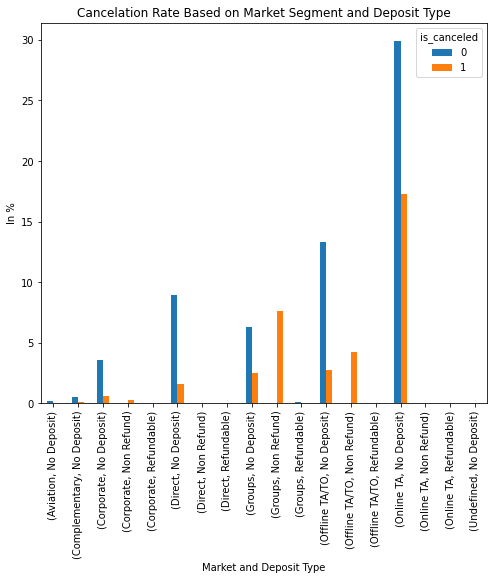

In [28]:
(pd.crosstab(index=[df['market_segment'], df['deposit_type']], columns=df['is_canceled'], normalize=True) * 100).round(2).plot(kind='bar', figsize=(8, 7),
title = 'Cancelation Rate Based on Market Segment and Deposit Type',
xlabel = ('Market and Deposit Type'), ylabel = 'In %', sort_columns = True)
plt.show()

### Insights 6:

- From the results of the multivariate analysis above, it can be seen that the highest cancellation rate comes from Online TA with the 'No Deposit' type of deposit.

### Business Question 7:

Are the variables of deposit and cancellation types related to each other?

In [29]:
eda_bq5 = df[['deposit_type', 'is_canceled']].copy()
eda_bq5.head()

,deposit_type,is_canceled
0,No Deposit,0
1,No Deposit,0
2,No Deposit,0
3,No Deposit,0
4,No Deposit,0


In [30]:
crosstab_bq5 = pd.crosstab(index=eda_bq5['deposit_type'], columns=eda_bq5['is_canceled'])
crosstab_bq5

is_canceled,0,1
deposit_type,,
No Deposit,74947,29694
Non Refund,93,14494
Refundable,126,36


In [31]:
from scipy.stats import chi2_contingency

In [32]:
stats, pval, dof, exp = chi2_contingency(crosstab_bq5)
if pval <= 0.05:
    print('Variabel Dependent is with Each Other')
else:
    print('Variabel Independent is from Each Other')

Variabel Dependent is with Each Other


### Insight 7:
- From the results of the Chi-Square Test, it was found that the p value < 0.05, which means that the variables of deposit and cancellation types are dependent on each other.

### Business Question 8:

Does the difference between reserved room and assigned room affect the cancellation?

In [33]:
#1 Create a new column 'is_different_type' to display data for bookings whose room types are different from those booked

df['is_different_type']=df['reserved_room_type']!=df['assigned_room_type']
df['is_different_type']=df['is_different_type'].astype('int64')

In [34]:
#2 Create a crosstab comparison of booking cancellations when the booked room is not available and is changed to another type

(pd.crosstab(index=[df['hotel'], df['is_different_type'][df['is_different_type']==True]], columns=df['is_canceled'], margins=True) * 100).round(2)


,is_canceled,0,1,All
hotel,is_different_type,,,
City Hotel,1,677400,41800,719200
Resort Hotel,1,734100,38400,772500
All,,1411500,80200,1491700


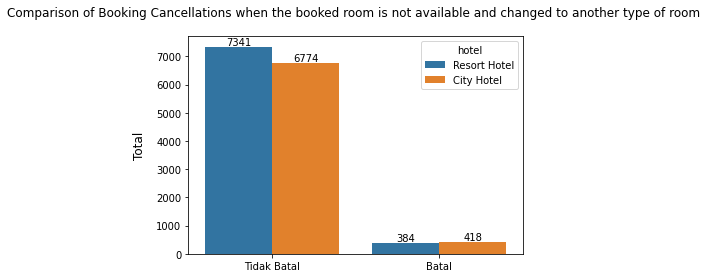

In [35]:
ax=sns.countplot(x='is_canceled', data=df[df['is_different_type']==1],hue='hotel')
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.xticks(np.arange(2),['Tidak Batal','Batal'])
# plt.yticks(np.arange(0,100000,5000))
plt.xlabel('')
plt.ylabel('Total', size=12, labelpad=10)
plt.title('Comparison of Booking Cancellations when the booked room is not available and changed to another type of room ',size=12, pad=20)
plt.show()

In [36]:
#2 Make a crosstab comparison of 'is canceled' booking cancellations with bookings with different room types from those booked

(pd.crosstab(index=[df['hotel'], df['is_different_type'][df['is_different_type']==True]], columns=df['is_canceled'], normalize=True, margins=True) * 100).round(2)


,is_canceled,0,1,All
hotel,is_different_type,,,
City Hotel,1,45.41,2.80,48.21
Resort Hotel,1,49.21,2.57,51.79
All,,94.62,5.38,100.00


### Insights 8:
- 94.62% of guests whose rooms have changed from those booked do not cancel their bookings.

- Meanwhile, only 5.38% of guests whose rooms have changed from those booked cancel their orders

### Business Question 9:

How do bookings as new guests and bookings as repeated guests compare?

In [37]:
#1 Show data on the number of bookings as new guests and bookings as repeated guests for both types of hotels from 2015-2017
pd.crosstab(index=df['hotel'], columns=df['is_repeated_guest'], values=df['is_repeated_guest'], aggfunc=('count'), margins=True, margins_name='Total')

is_repeated_guest,0,1,Total
hotel,,,
City Hotel,77298,2032,79330
Resort Hotel,38282,1778,40060
Total,115580,3810,119390


In [38]:
#1 Show data on the number of bookings as new guests and bookings as repeated guests for both types of hotels from 2015-2017
(pd.crosstab(index=df['hotel'], columns=df['is_repeated_guest'], values=df['is_repeated_guest'], aggfunc=('count'), normalize=True, margins=True, margins_name='Total')*100).round(2)

is_repeated_guest,0,1,Total
hotel,,,
City Hotel,64.74,1.70,66.45
Resort Hotel,32.06,1.49,33.55
Total,96.81,3.19,100.00


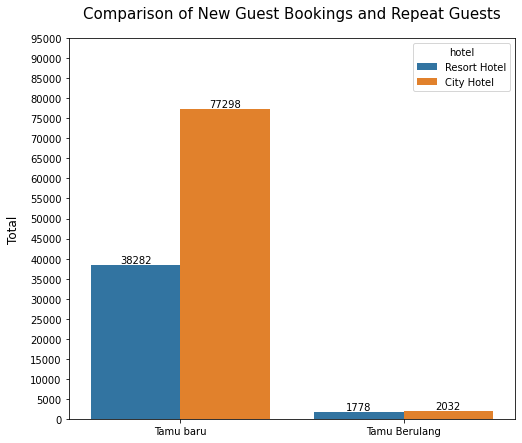

In [39]:
plt.figure(figsize=(8,7))
ax=sns.countplot(x='is_repeated_guest', hue='hotel', data=df)
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.xticks(np.arange(2),['Tamu baru','Tamu Berulang'])
plt.yticks(np.arange(0,100000,5000))
plt.xlabel('')
plt.ylabel('Total', size=12, labelpad=10)
plt.title('Comparison of New Guest Bookings and Repeat Guests',size=15, pad=20)
plt.show()

### Insight 9:
- Bookings made by new guests are much higher, which are 115,580 compared to bookings by repeated guests, which are 3,810.
- Bookings made by new guests at City Hotel have a much higher number of 77,298 compared to 38,282 resort hotels
- The number of bookings made by repeated guests at City Hotels is not much different from Resort Hotels, with city hotels with 2,032 repeated guests and resort hotels with 1,778 repeated guests.
- In total, the number of new guests orders has a much higher percentage of 96.81% compared to repeat guests of 3.19%

## Business Question 10
How is the comparison of the number of visitors for adults, children, and infants for city hotels and resort hotels? 

In [40]:
#1 Show comparison data on the number of visitors for adults, children, and infants for city hotels and resort hotels
adult=pd.crosstab(index=df['hotel'], columns='Adults', values=df['adults'], aggfunc=('sum'))
children=pd.crosstab(index=df['hotel'], columns='Children', values=df['children'], aggfunc=('sum')).astype('int64')
babies=pd.crosstab(index=df['hotel'], columns='Babies', values=df['babies'], aggfunc=('sum'))
tamu=pd.concat((adult, children,babies), axis=1).T
pd.concat((adult, children,babies), axis=1)


col_0,Adults,Children,Babies
hotel,,,
City Hotel,146838,7248,392
Resort Hotel,74798,5155,557


<Figure size 576x504 with 0 Axes>

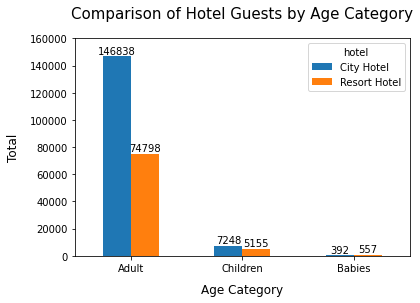

In [41]:
plt.figure(figsize=(8,7))
ax=tamu.plot(kind='bar')
for i in range(2):
    ax.bar_label(ax.containers[i], label_type='edge', padding=0.5)
plt.xticks(np.arange(3),['Adult','Children','Babies'],rotation=0)
plt.yticks(np.arange(0,180_000,20_000))
plt.title('Comparison of Hotel Guests by Age Category', pad=20, size=15)
plt.xlabel('Age Category', labelpad=10, size=12)
plt.ylabel('Total', labelpad=10, size=12)

plt.show()

### Insights 10:
- The number of adult guests at the city hotel is 146,838, almost double the number of resort hotels which have a total of 74,798.

- The number of children guests at the city hotel is 7,248, more than the resort hotel which has 5,155.

- The number of baby guests at the city hotel is 392, less than the resort hotel which has 557.

## Analysis:
- Business Question 1-3:
    - City Hotel, which is located in Lisbon, Portugal, has a lot of historical and cultural tourism potential, so City Hotel has many enthusiasts plus it is easy for foreign tourists to come through the international airport. Resort Hotel is located in the Algarve in the south of Portugal, which has beach views and the atmosphere of a quiet coastal village and port city with a long history.
    - Both hotels types have an increasing and decreasing trend of visitors. February-June coincides with summer which is the high season for the hotels and July-October which coincides with autumn, and cultural festivals in Portugal.

- Business Question 4-7:
    - From several bivariate-multivariate analysis results that have been carried out, bookings with 'No Deposit' always have the highest cancellation rate. Especially 'No Deposit' on City Hotel bookings, and 'No Deposit' on bookings through Online Travel Agents.

    - With Chi-Squared analysis, it was found that the deposit type variable and the cancellation variable, are correlated.

- Business Question 8-10:
    - Cancellation of orders when there is a change in room type due to the room being booked is not available, has a relatively smaller cancellation number compared to guests who do not cancel their order, which is 5.38%. This means that most guests even if they get a room change from what they have booked, most of them did not cancel their booking.

    - From the comparison of the number of new guest bookings and repeat guest bookings, it was found that the percentage of new guest bookings was much larger than repeated guests which was only 3.19%. Based on the journal entitled "Why Customers Don't Revisit in Tourism and Hospitality Industry?" by Jing-Rong Chang, the reason guests do not rebook can be due to the accessibility of the hotel's less strategic location, prices that do not match the facilities, cleanliness of the hotel, and negative reviews on the internet.

    - Data on the number of hotel guests by age category shows that adult guests at City Hotel have almost 2x the number of Resort Hotels. Although the number of adult guests of the two hotels has a significant difference, the data on the number of guests in the Children and Infant categories has a difference that is not much different. City Hotel has more guests in the Child age category than Resort Hotel, but Resort Hotel has more guests in the infant age category than City Hotel. This means that the proportion of guests with children and babies at Resort Hotels is greater than City Hotel.

## Business Recommendations:
- Business Question 1-3:

    - The analyzed length of stay data is in accordance with the journal of 'Lisbon and Porto Hotel Market Research & Forecast Report' written by Joaquim Chambel which states that the average hotel visitor stayed between 1-3 days. The trend of increasing visitors can be an optimistic view by increasing the supply of rooms and improving the quality of hotels to accommodate the growth of tourism in Portugal.
    - There is an increasing trend of visitors in February-June which coincide with summer in Portugal, which according to the research of 'Season and Weather Effects on Travel-Related Mood and Travel Satisfaction' by Margareta Friman et al. Sunny weather that supports outdoor activities will increase the mood and satisfication of traveling. Based on these findings, the hotel's `Marketing Division` can adjust the marketing method for the summer season. According to Nancy Huang, Senior Marketing Director, as quoted from her article on pegasus.com, summer is the best time to offer a package and outdoor activities such as collaborating with tourist attractions in the area. In addition to these promotions, the hotel can also use social media to show what the summer activities will look like in the summer holidays.
    - The trend of increasing visitors in July-October coincides with autumn season in Portugal. According to Lamia Darwish's writing entitled 'Best Time To Visit Portugal', Portugal tourism experienced a high-demand in this period. This is due to the warmer weather, the grape harvest, the quieter beaches, and the cultural festivals held every year on Portugal. The `Guest Relations Division` can make improvisations in line with the study 'Outdoor Tourism in the North of Portugal from the Perspective of Tourist Entertainment Companies' which states that hotels can offer outdoor activities such as walking tours and take advantage of less hot and sunny weather.

- Business Question 4-7:

    - Based on a study conducted in 2019 by Fernández, Vall-Llosera, and Moya entitled "ANALYSIS OF OTA IMPACT ON HOTEL RESERVATIONS", the study found that hotel bookings through Online Travel Agents (OTA) account for up to 93.2% of total hotel bookings. This is in line with the dataset that we use, where the largest hotel bookings come from OTAs (47%). Based on this, the `Marketing Division` of the hotel can focus on promotion and marketing through OTA channels in order to reach the widest market. Plus, based on data from PhocusWright (a research company focused on the Travel industry), 60% of travelers will visit OTAs when doing research for options when they travel. By doing marketing through OTA, a hotel will be able to become a 'stand-out' option when founded by potential visitors on OTA.
    
    - The 'No Deposit' deposit type always has the highest order cancellation rate. In contrast, 'refundable' and 'non-refundable' deposit types always have lower cancellation rates. In addition, after conducting a chi-squared test between the deposit types and order cancellation variables, it was found that the two variables were related. This is in line with a study conducted by Chayanon Tongmunkorn (2021) where he found that the type of deposit is one of the most influential variables on the customer's decision to cancel an order. Based on a study by Chen, Schwartz, and Vargas (2011), hotels can optimize their revenue system by varying their booking cancellation policies, such as the use of deposits, cancellation deadlines, and attractive offers. Based on this, the `executive office` division, which is in charge of managing all hotel operations, can implement a discount if a customer makes a reservation with a 'refundable' deposit type and gives discounts + other offers for customers who choose a 'non-refundable' deposit type. In addition, the hotel can also provide strict cancellation deadlines for bookings of the 'no deposit' type.

- Business Question 8-10:

    - To attract a guest to come back, hotel cleanliness must always be considered. The `Houeskeeper` Department can make strict cleaning schedules and controlled reports to ensure hotel cleanliness is maintained. And then the `Department of Sales & Marketing` which is responsible for managing the hotel website must be able to identify negative customer comments on the internet and respond to them quickly and carefully. A less strategic location can also be anticipated by providing a shuttle bus that is connected to tourist attractions or public transportation, this can be prepared by the `Front Office Department` of the hotels.
    - Resort Hotels are widely chosen by guests who have children and babies. According to **Mags Huggins** who has worked in the tourism industry for more than 20 years, hotels need to find ways to differentiate themselves to attract guests. Many hotels have successfully marketed themselves with one of the fastest growing segments being families segments. To attract the number of guests who come, the `Housekeeper` Department as the manager of the hotel's public area, in coordination with the `Financial Department` can add facilities for children's playgrounds. And the `Sales & Marketing Department` which takes care of public relations can make eventual events such as cooking classes for kids and magic shows. Then the `Food & Beverage Department` which manages hotel F&B's can make an attractive breakfast menu choices for children. The `Department of Sales & Marketing` which is in charge of managing the hotel website can also display lots of pictures of children having fun as well as reviews from parents who bring children on the hotel website pages. 